In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [19]:
df.shape

(331, 3)

In [3]:
df.dropna(inplace=True)

<AxesSubplot:ylabel='Density'>

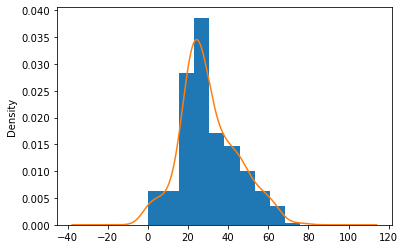

In [4]:
df['Age'].hist(density=True)
df['Age'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

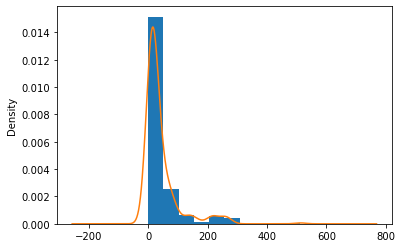

In [5]:
df['Fare'].hist(density=True)
df['Fare'].plot(kind='kde')

In [6]:
df['Age'].skew()

0.455808097479497

In [7]:
df['Fare'].skew()

3.2942383352099363

<AxesSubplot:>

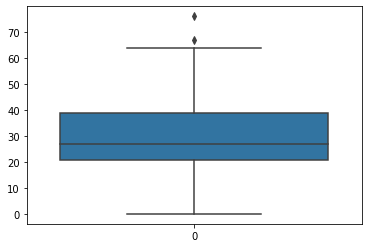

In [8]:
sns.boxplot(df['Age'])

<AxesSubplot:>

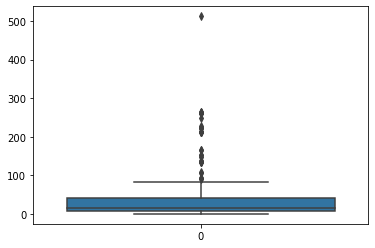

In [9]:
sns.boxplot(df['Fare'])

In [10]:
df['Age'].describe()

count    331.000000
mean      30.181269
std       14.104573
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [11]:
df['Fare'].describe()

count    331.000000
mean      40.982087
std       61.228558
min        0.000000
25%        8.050000
50%       16.000000
75%       40.633350
max      512.329200
Name: Fare, dtype: float64

In [12]:
# Finding the IQR
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)

In [13]:
iqr = percentile75 - percentile25

In [14]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [15]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 89.508375
Lower limit -40.825025


# Finding Outliers

In [16]:
df[df['Fare'] > upper_limit]

,Survived,Age,Fare
24,1,48.0,262.3750
53,1,28.0,263.0000
59,1,36.0,262.3750
64,0,13.0,262.3750
69,1,60.0,263.0000
74,1,35.0,211.5000
75,0,32.5,211.5000
81,0,67.0,221.7792
114,1,63.0,221.7792
141,1,33.0,151.5500


In [17]:
df[df['Fare'] < lower_limit]

,Survived,Age,Fare


# 1.Trimming

In [18]:
new_df = df[df['Fare'] < upper_limit]

new_df.shape

(297, 3)

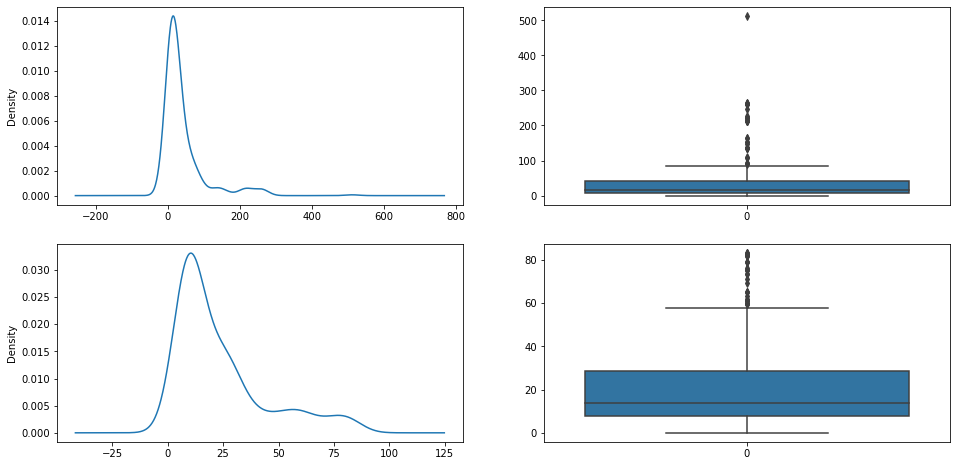

In [21]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df['Fare'].plot(kind='kde')

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
new_df['Fare'].plot(kind='kde')

plt.subplot(2,2,4)
sns.boxplot(new_df['Fare'])

plt.show()

# 2.Capping

In [22]:
new_df_cap = df.copy()

new_df_cap['Fare'] = np.where(
    new_df_cap['Fare'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Fare'] < lower_limit,
        lower_limit,
        new_df_cap['Fare']
    )
)

In [24]:
new_df_cap.shape

(331, 3)

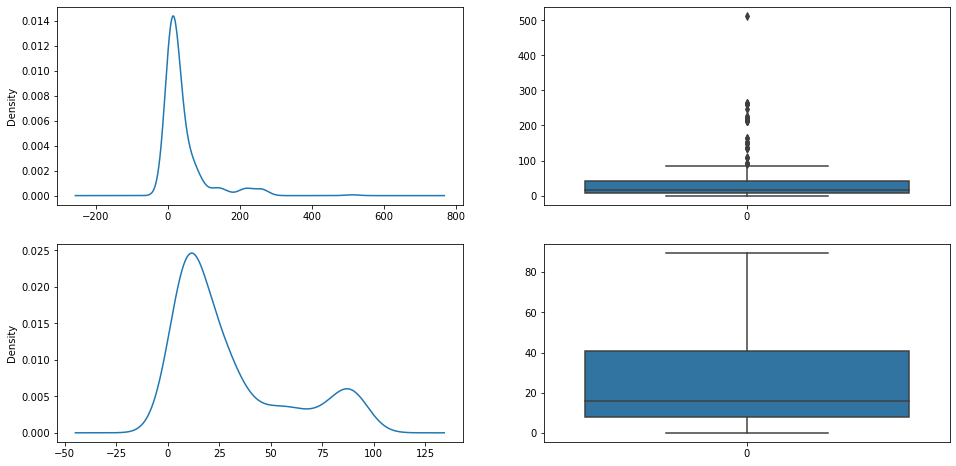

In [25]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df['Fare'].plot(kind='kde')

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
new_df_cap['Fare'].plot(kind='kde')

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Fare'])

plt.show()